In [28]:
import numpy as np

# 3.1 You have a bag with two coins. 
# One will come up heads 40% of the time, 
# and the other will come up heads 60%. 
# You pick a coin randomly, flip it and get a head. 
# What is the probability it will be heads on the next flip?

# BONUS: What if you flip two heads with coin. What is P(H) on next flip?

class Coin(object):
    def __init__(self, prob_head):
        self.prob_head = prob_head
        
    def flipIsHead(self):
        return np.random.random() < self.prob_head
    
# Test the Coin class by uncommenting:
# c = Coin(0.9)
# print c.flipIsHead()

class CoinPurse(object):
    def __init__(self):
        self.coins = []

    def add_coin(self, prob_head):
        self.coins.append(Coin(prob_head))
    
    def pick_coin_at_random(self):
        return np.random.choice(self.coins)
    
purse = CoinPurse()
purse.add_coin(0.4)
purse.add_coin(0.6)
# print purse.pick_coin_at_random().prob_head

num_trials = 100000
trial_count = 0
head_count = 0
while trial_count < num_trials:
    coin = purse.pick_coin_at_random()
    if coin.flipIsHead():
        trial_count += 1
        if coin.flipIsHead():
            head_count += 1

print float(head_count) / num_trials

0.53822


In [27]:
# 3.3 In front of you is a jar of 1000 coins. 
# One of the coins has two heads, and the rest are fair coins. 
# You choose a coin at random, and flip it ten times, getting all heads. 
# What is the probability it is one of the fair coins?
# WARNING: SLOW!!!
# Possible exercise on vectorization. E.g. 

num_coins_in_jar = 1000
num_flips_to_get_all_heads = 10
num_trials = 10


purse = CoinPurse()
purse.add_coin(1)
for i in range(0,num_coins_in_jar - 1):
    purse.add_coin(0.5)

trial_count = 0
two_headed_count = 0

while trial_count < num_trials:
    coin = purse.pick_coin_at_random()
    all_heads = True
    for i in range(0,num_flips_to_get_all_heads):
        if not coin.flipIsHead():
            all_heads = False
            break
    if all_heads:
        trial_count += 1
        if coin.prob_head == 1:
            two_headed_count += 1

print float(two_headed_count) / trial_count

0.4


In [5]:
# 3.5 [2] Starting at one vertex of a cube, 
# and moving randomly from vertex to adjacent vertices, 
# what is the expected number of moves until 
# you reach the vertex opposite from your starting point?
import numpy as np

dimension = 4
number_trials = 10000
trials =  np.zeros(number_trials)

for index in range(number_trials):
    vertex = np.zeros(dimension)
    while sum(vertex) < dimension:
        vertex_index_to_change = np.random.randint(dimension)
        vertex[vertex_index_to_change] = 1 - vertex[vertex_index_to_change]
        trials[index] = trials[index] + 1
print np.mean(trials)

21.3834


Populating the interactive namespace from numpy and matplotlib
2.755


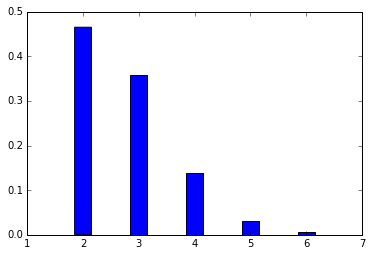

In [11]:
# 3.8 You have a spinner that generates random numbers 
# that are uniform between 0 and 1. You sum the spins 
# until the sum is greater than one. 
# What is the expected number of spins?
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

num_trials = 1000

def sumPastOne():
    sum = 0
    count = 0
    while sum <= 1:
        sum += np.random.random()
        count += 1
    return count
        
trials = [sumPastOne() for d in range(num_trials)]
num_bins = np.max(trials) - np.min(trials) + 1
plt.hist(trials, bins = num_bins, normed=True, 
         align='left', rwidth=0.3, range = (2, 2 + num_bins))
print np.mean(trials)

49.49


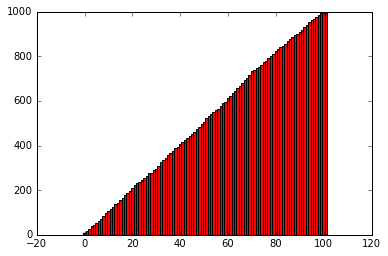

In [51]:
# 4.4 You have a basket of n assets. 
# The asset returns are multivariate normal with zero mean. 
# Correlation between any pair of assets is 1/2. 
# What is the probability that k of the assets will have negative return?

class Basket():
    def __init__(self, number_names, correlation):
        self.number_names = number_names
        self.correlation = correlation
        
    def simulated_returns_less_than(self, threshold):
        market = np.random.randn(1)
        idiosyncratic_noise = np.random.randn(self.number_names) 
        asset_returns = idiosyncratic_noise * sqrt(1 - self.correlation) + sqrt(self.correlation) * market
        return len(filter(lambda x: x < threshold, asset_returns))

num_names = 100
basket = Basket(num_names, 0.5)
num_trials = 1000
trials = [basket.simulated_returns_less_than(0) for d in range(num_trials)]
num_bins = num_names + 2
plt.hist(trials, color='r', bins = num_bins, cumulative=True, 
         align='left', range = (0, num_names + 2))
print np.mean(trials)


In [16]:
# 3.10 A stick is broken randomly into 3 pieces. 
# What is the probability of the pieces being able to form a triangle?
import numpy as np

num_trials = 100000
triangle_count = 0
for i in range(num_trials):
    breaks = [np.random.random(), np.random.random()]
    breaks.sort()
    lengths = [breaks[0], breaks[1]-breaks[0], 1 - breaks[1]]
    if(max(lengths) < 0.5):
        triangle_count += 1
print float(triangle_count)/num_trials

0.24971


In [25]:
# 3.11 A stick is broken randomly into two pieces. 
# The larger piece is then broken randomly into two pieces. 
# What is the probability of the pieces being able to form a triangle?
import numpy as np

num_trials = 1000000
triangle_count = 0
for i in range(num_trials):
    second_break = np.random.random() 
    if second_break < 0.5:
        second_break = 1 - second_break
    first_break = second_break * np.random.random()
    if first_break < 0.5 and second_break - first_break < 0.5:
        triangle_count += 1
print float(triangle_count)/num_trials

0.38522


In [9]:
# 5.10 Suppose there are 42 students in the QFRM program, 
# each assigned a unique integer from 1 to 42. 
# Forty-two quarters are laid out on a table in a row, heads up. 
# Each student goes to the table, and if they are assigned the number n, 
# they turn over the nth coin, the 2nth coin, and so on. 
# So, for example, the student who is assigned 20 
# will turn over the 20th and 40th coins. 
# When everyone is done, how many tails are showing?
num_quarters = 42
quarters = [(n, False) for n in range(1,num_quarters)] #List comprehension!

#flip all the switches for all students
for ctr in range(1, num_quarters):
    def flip(quarter):
        if(quarter[0] % ctr == 0):
            return (quarter[0], not quarter[1])
        return quarter
    quarters = map(flip, quarters)

def heads_up(quarter):
    return quarter[1]
def quarter_number(quarter):
    return quarter[0]

# select only those quarters that are on, and extract the student number
print map(quarter_number, filter(heads_up, quarters))

[1, 4, 9, 16, 25, 36]
